In [1]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
from scipy.stats import norm
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [2]:
# Set Current Directory
currentPath = os.getcwd()
subFolder = "/ml-100k/"
os.chdir(currentPath+subFolder)

In [3]:
def ImportFile(fileName,feature,sep,crange):
    if sep == None:
        sep = '|'
    if crange == None:
        df = pd.read_csv(fileName, sep=sep,names=feature,encoding='latin-1')
    else:
        df = pd.read_csv(fileName, sep=sep,names=feature,usecols=range(crange),encoding='latin-1')
    return df

In [4]:
ratingFeature = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

In [5]:
ratingDf = ImportFile('u.data',ratingFeature,'\t',4)
print('total user rating genre : ',len(ratingDf))
ratingDf.info()
ratingDf.head()

total user rating genre :  100000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id           100000 non-null int64
movie_id          100000 non-null int64
rating            100000 non-null int64
unix_timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
pivotRatingDf = ratingDf.pivot_table(index=['movie_id'],columns=['user_id'],values='rating').reset_index(drop=True)
pivotRatingDf.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
0,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
1,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(52,0.5,'user_id')

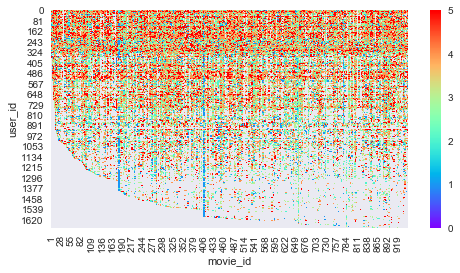

In [25]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
sns.heatmap(pivotRatingDf, 0,5, cmap='rainbow')
ax.set_xlabel('movie_id')
ax.set_ylabel('user_id')

In [26]:
pivotRatingDf.fillna(0,inplace=True)
pivotRatingDf.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
1,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.decomposition import NMF

In [33]:
R = [
     [5,3,0,1],
     [4,0,0,1],
     [1,1,0,5],
     [1,0,0,4],
     [0,1,5,4],
    ]
R = np.array(R)

In [34]:
nmf = NMF()
W = nmf.fit_transform(R);
H = nmf.components_;

In [38]:
nR = np.dot(W,H)
pd.DataFrame(nR).round(4)

,0,1,2,3
0,5.0000,3.0,0.0,1.0
1,4.0000,0.0,0.0,1.0
2,1.0000,1.0,0.0,5.0
3,1.0000,0.0,0.0,4.0
4,0.0037,1.0,5.0,4.0


In [19]:
pd.DataFrame(W).shape

(5, 4)

In [20]:
pd.DataFrame(H).shape

(4, 4)

In [40]:
nmf = NMF()
W = nmf.fit_transform(pivotRatingDf);
H = nmf.components_;

In [41]:
nR = np.dot(W,H)
#print(nR)
final = pd.DataFrame(nR)
final.round(4)

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,5.0000,3.9265,0.0000,0.0465,4.0000,4.0000,0.0095,0.0435,0.0058,3.9668,...,2.0000,2.9513,3.9787,0.0016,4.0000,0.0248,0.1232,4.9174,0.0023,0.0134
1,2.9992,0.0022,0.0025,0.0012,2.9990,0.0000,0.0000,0.0111,0.0005,0.0000,...,3.9914,0.0078,0.0000,0.0000,0.0013,0.0001,0.0090,0.0000,0.0004,4.9991
2,3.9991,0.0000,0.0614,0.0133,0.0166,0.0140,0.0000,0.0001,0.0149,0.0000,...,0.0000,0.0079,3.9892,0.0101,0.1572,0.0084,0.0113,0.0000,0.0000,0.0000
3,3.0001,0.0000,0.0255,0.0000,0.0000,0.0000,5.0001,0.1141,0.0000,4.0001,...,5.0007,0.0108,0.0000,0.0000,0.0023,0.0008,1.9982,0.0000,0.0000,0.0000
4,2.9987,0.0197,0.0738,0.0000,0.0080,0.1326,0.0002,0.0971,0.0000,0.0000,...,0.0000,0.0568,0.0000,0.0000,0.0648,0.0001,0.0355,0.0001,0.0262,0.0735
5,5.0023,0.0849,0.0027,0.0026,0.0022,0.0601,0.0017,0.0009,3.4134,0.0004,...,0.0003,0.0007,5.0173,0.0503,0.0121,0.0008,0.0186,0.0120,0.0548,0.0444
6,3.9997,0.0019,0.0558,0.0000,0.0001,2.0000,5.0001,2.9995,4.0000,4.0000,...,0.0000,0.0004,4.0000,0.0000,3.9996,0.0053,4.0002,3.9997,0.0001,0.0037
7,1.0000,0.0097,0.0030,0.0000,0.0032,4.0000,5.0002,0.0076,0.0007,0.0050,...,0.0096,0.0029,0.0004,0.0004,0.0155,0.0013,5.0000,0.0000,0.0031,0.0000
8,4.9994,0.0068,0.0009,0.0000,0.0000,3.9954,4.9997,0.0055,0.0023,3.9992,...,0.0006,0.9983,3.9987,4.9967,2.9973,4.9956,3.0000,0.0000,0.0000,2.9989
9,2.9979,1.9933,0.0020,0.0000,0.0000,0.0002,3.9998,0.0026,0.0004,0.0002,...,0.0000,0.0033,0.0001,0.0000,0.0035,0.0000,0.0244,0.0000,0.0000,0.0000
